# Mobile Price Prediction

In this project we will predict possible price of mobile phones on the base of phone specification. Mobile industry is widely expanding day by day. Lots of new mobile models coming everyday with various specification. Sometimes its hard to compare mobiles and decide which one is good and worth to buy.


# Dataset Introduction

**Columns**
* id: ID
* battery_power: Battry power in mAH (Total energy a battery can store in one time measured)
* blue: If mobile has bluetooth or not
* clock_speed: microprocessor speed to executes instructions
* dual_sim: Dual sim or not
* fc:Front Camera mega pixels
* four_g:Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight
* n_cores: Number of cores of processor
* pc:Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: RAM in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: Aingle battery charge's longest time
* three_g: Has 3G or not
* touch_screen: Touch screen or not
* wifi: Has wifi or not


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Charts
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Import datase and initial dataset review

In [2]:
# Import Datasets

# Train DF
df_train = pd.read_csv('../input/mobile-price-classification/train.csv')

# Test DF
df_test = pd.read_csv('../input/mobile-price-classification/test.csv')

In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_train.info()

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We have 2000 records in train dataset and 1000 records in test dataset

# Missing Values Corrections

<AxesSubplot:>

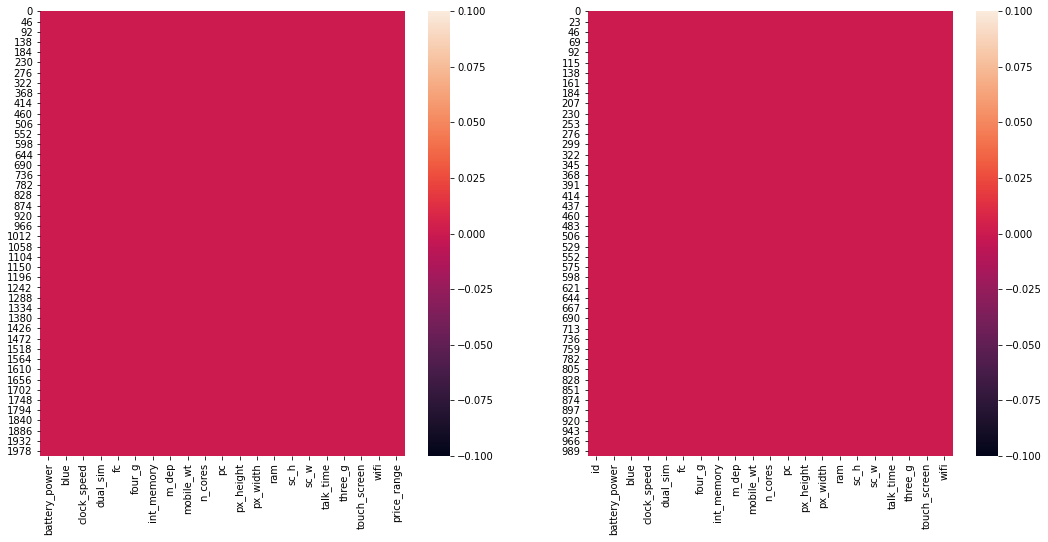

In [5]:
# Check missing value from dataset
plt.figure(figsize=(18,18))
plt.subplot(221)
sns.heatmap(data=df_train.isnull())
plt.subplot(222)
sns.heatmap(data=df_test.isnull())

Both datasets are pretty good. There is not missing values in both datasets

# Data Visualization

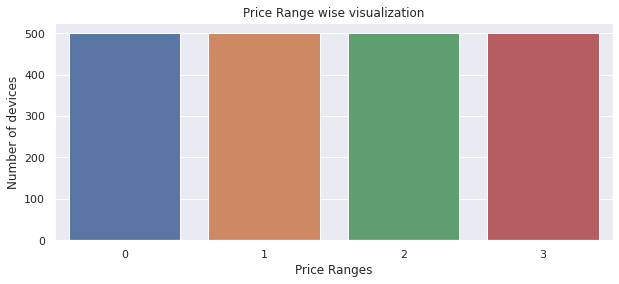

In [6]:
# Let's see howmany price ranges we have in train dataset

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)

sns.countplot(x='price_range', data=df_train)
plt.xlabel('Price Ranges')
plt.ylabel('Number of devices')
plt.title('Price Range wise visualization')
plt.show()

In [7]:
# Count 4G devices
df_train.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

1043 devices has 4G and 957 devices does not have 4G

([<matplotlib.patches.Wedge at 0x7f188e9e0210>,
 [Text(-1.097491732278043, -0.07424215501546373, '4G Supported'),
  Text(1.0974917322780433, 0.07424215501546359, 'Not supported')],
 [Text(-0.5986318539698416, -0.04049572091752567, '52.1%'),
  Text(0.5986318539698418, 0.040495720917525596, '47.9%')])

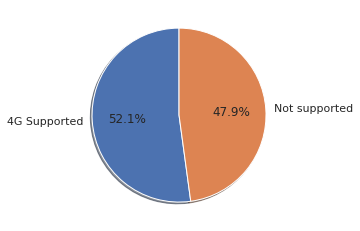

In [8]:
# Percentage of mobiles with 4G feature

labels = ["4G Supported",'Not supported']
values = df_train['four_g'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)

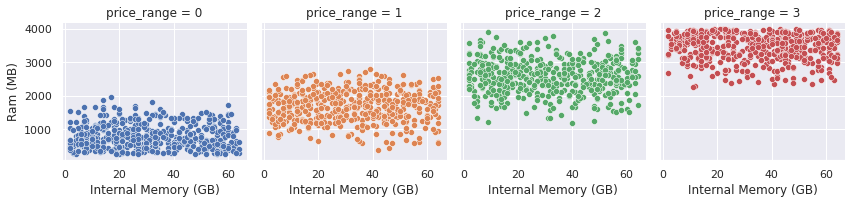

In [9]:
# Visulize price range on internal memory and ram which is top most parameters when anyone buy mobile phone

g = sns.FacetGrid(df_train, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")

Here we can see price range 0 has lower configuration. Configuration is increasing when price range is increasing

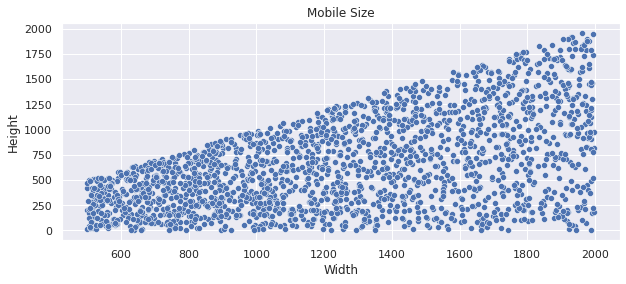

In [10]:
# Visulize 

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)

sns.scatterplot(data=df_train, x='px_width', y='px_height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Mobile Size')
plt.show()

Phone size data is consistant. As height is increasing, width is increasing which is ideal case

<Figure size 720x288 with 0 Axes>

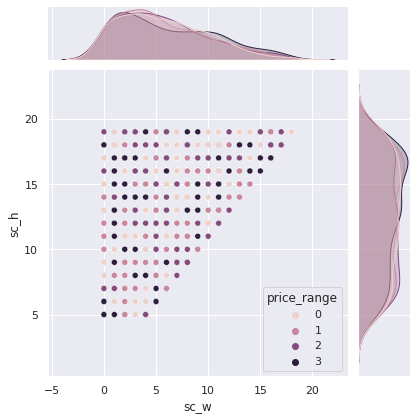

In [11]:
# Visulize Screen size (Height x Width) vs Price Range

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)
g = sns.jointplot(data=df_train, x="sc_w", y="sc_h", hue="price_range")
plt.show()

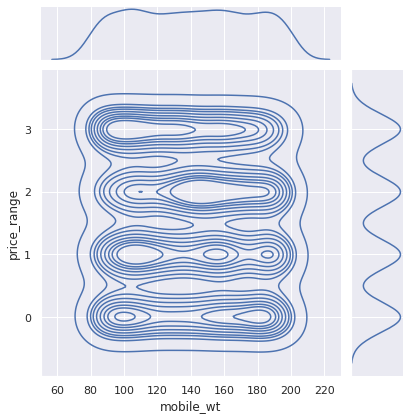

In [12]:
# Mobile Weght vs Price range

sns.jointplot(x='mobile_wt', y='price_range',data=df_train, kind='kde')

# Data Spliting
As we have only feature columns in test dataset. We will split train dataset and evaluate model in train dataset only

In [13]:
train_x = df_train.drop('price_range', axis=1)
train_y = df_train.price_range

In [14]:
print("Freature shape: ", train_x.shape, " | Labels", train_y.shape)

Freature shape:  (2000, 20)  | Labels (2000,)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.35, random_state=5)

# Model Evaluation

In [16]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix

In [17]:
# Define models in object
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "Decisiontree": DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(max_features='sqrt', random_state=5),
    'LogisticRegression': LogisticRegression(),
    'Lasso': Lasso(alpha=0.1)
}

In [18]:
# Looping through the models and fiting dataset to each model. Calculate score
for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")
    

Linear Regression
Score:  0.9171545400834933

KNN
Score:  0.9271428571428572

Decisiontree
Score:  0.8142857142857143

RandomForest
Score:  0.8714285714285714

LogisticRegression
Score:  0.6071428571428571

Lasso
Score:  0.9182822648516433



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


From above test we found that KNeighborsClassifier is predict the price range accurately

# Predicting Test Data

In [19]:
# Preparing test dataset
data_test = df_test.drop('id',axis=1)

In [20]:
data_test.info()
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

(1000, 20)

In [21]:
x = df_train.drop('price_range', axis=1)
y = df_train['price_range']

In [22]:
# Predict price range using KNN model
knn = KNeighborsClassifier()
knn.fit(x, y)
pred_price = knn.predict(data_test)

In [23]:
# Adding Predicted price range to test dataset 
data_test['price_range'] = pred_price

In [24]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


**Please upvote if you like **

**To be continued**